<a href="https://colab.research.google.com/github/ritikkumar005/Airline-passenger-referral-prediction/blob/main/Airline_passenger_referral_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT NAME - AIRLINE PASSENGER REFERRAL PREDICTION

PROJECT TYPE - CLASSIFICATION

CONTRIBUTION - INDIVIDUAL - RITIK KUMAR



PROJECT SUMMARY -


*   The project began with data loading , followed by EDA , feature engineering , data cleaning , target encoding , feature selection and model building .
*   Different models were used , including logistic regression , random forest , naive bayes , decision tree , support vector machine and k nearest neighbour .

*   Hyperparameter tuning was performed for decision tree , random forest , k- Nearest neighbors , support vector machines , and naive bayes models using the gridsearch cv method to improve accuracy and avoid overfitting

*  The Gradient Boosting model was fine-tuned by adjusting hyperparameters based on an understanding of the business and problem use cases .


*   The classification metrics for Recall were given first priority , followed by accuracy and ROC AUC .
*   Classifier models were created using six different types , all of which provided over 90% accuracy , with logistic Regression giving the best model .


*  Among the experiment models , SVM was found to be the most accurate with a very small margin .
*   The most important features were overall rating and value for money , which helped the model predict whether passengers would recommend a particular airline to their friends .


*   The developed classifier models can be used to predict passenger recommendation and identify influential passenger who can help generate more revenue for airlines .
*  To grow their business , airlines must provide outstanding cabin service , ground handling , entertaining food , beverages , and comfortable seating .


*   Data was collected from various sources , including customer reviews and airline websites , to obtain a comprehensive understanding of the airline industry .
*   Feature engineering was performed to extract relevant information from the raw data , including creating new features suct as the ratio of positive to negative reviews for each airline .


*   Data cleaning involved dealing the missing data , correcting data inconsistencies and removing irrelevant features .

*   Target encoding was used to transform categorical variables into numerical ones that can be used in the machine learning models .
*   Feature selection was done to identify the most important features that have the greatest impact on the target variable , which in this case was whether or not a passenger would recommend the airline .


*  Different evaluation metrics were used to assess the performance of the models , including precision , recall , accuracy and ROC AUC .



*   The models were trained and tested using a variety of techniques , such as cross - validation and train-test split ,to ensure their generalized to new data .
*  Interpretability of the models was also considered , with decision trees  being particularly useful for understanding how the models make predictions .


*  The project concluded with recommendations for airline to focus on improving features that are most important to passengers , such as overall rating and value for money , to increase the likelihood of recommendations and ultimately grow their business .






















GitHub Link -

Problem statement -

Data include airline reviews from 2006 to 2019 for  popular airlines around the world with multiple choice and free text questions . Data is scraped is spring 2019 . The main objective is to predict whether passengers will refer the airline to their friends .

Objective -

The primary goal is to forecast whether the passengers would recommend the airline .

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import lightgbm

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time
import secrets
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB

#importing metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import accuracy_score , precision_score
from sklearn.metrics import recall_score ,f1_score, roc_curve , roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

aviation_df=pd.read_excel(r'/content/drive/MyDrive/projects ml/data airline reviews/data_airline_reviews.xlsx')

In [ ]:
aviation_df.head(5)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
aviation_df.tail(5)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [ ]:
aviation_df.shape

(131895, 17)

In [ ]:
aviation_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [ ]:
#checking the unique values of the recommend column (target variable)

aviation_df.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

In [ ]:
aviation_df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

Duplicate values


In [ ]:
aviation_df.duplicated().sum()

70711

In [ ]:
aviation_df.drop_duplicates(inplace=True)

In [ ]:
aviation_df.duplicated().sum()

0

MIssing values / Null Values -



*   After reviewing the last 5 rows of the dataset , it appears that there are missing values present . To further investigate , we can determine the number of null values for each column in the large dataset .



In [ ]:
aviation_df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

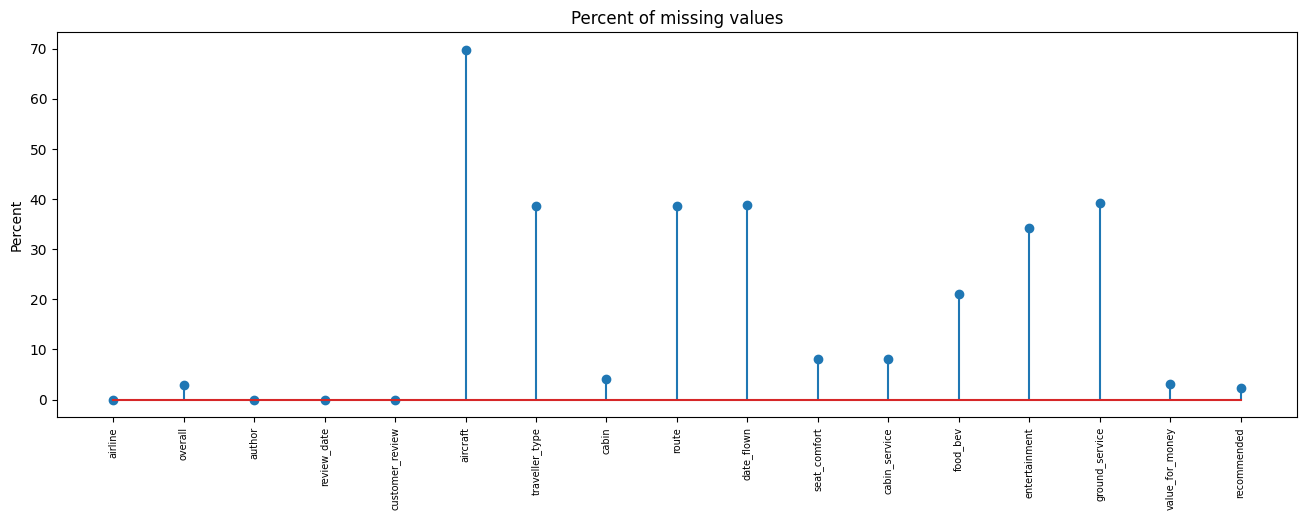

In [ ]:
#visualizing the missing values
missing = pd.DataFrame((aviation_df.isnull().sum())*100/aviation_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=plt.stem(missing['index'],missing[0])
plt.xticks(rotation=90,fontsize=7)
plt.title("Percent of missing values")
plt.ylabel("Percent")
plt.show()


What did you know about your dataset ?



 This dataset contains 131895 rows and 17 columns .

In [ ]:
aviation_df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,59401.000000,56211.000000,56240.000000,48341.000000,40230.000000,37169.000000,59327.000000
mean,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849
std,3.483701,1.436467,1.568429,1.483122,1.504452,1.613995,1.588433
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Variable Description -

1. airline - name of the airline .
2. overall - overall points are given to the trip between 1 to 10
3. author - author of the trip
4. review date - date of the review
5. customer review - review of the customers in free text format .
6. aircraft - type of the aircraft .
7. traveller type - type of the traveler (eg - business , leisure )
8. cabin - cabin at the flight date flown : flight date
9. seat comfort - rating from 1 to 5
10. cabin service - rating from 1 to 5
11. foodbev - rating from 1 to 5
12. entertainment - rating from 1 to 5
13. ground service - rating from 1 to 5
14. value for money - rating from 1 to 5
15. recommended : binary or target variable .

EXPLORATORY DATA ANALYSIS AND VISUALIZATION -

QUESTIONS -

1. What are the average ratings given by the passengers for food and beverages as well as entertainment in the economy class ?
2. Among the types of travelers , which one has the highest overall service ratings ?
3. Among the different types of cabins, which one has the highest overall service ratings?

4. Which type of traveler has received more ratings?

5. Which airline conducted the highest number of trips?

6. Does Solo Leisure provide good value for money?

7. Which type of cabin receives more recommendations?

8. Which type of cabin has received more service ratings?

9. Which airline conducted the lowest number of trips?

10. How do all of the independent variables/features compare with each other?

**What are the average ratings given by the passengers for food and beverages as well as entertainment in the economy class ?**

In [ ]:
#performing the group by method
q1= aviation_df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
q1

,cabin,food_bev,entertainment
0,Business Class,3.525108,3.356407
1,Economy Class,2.776919,2.758083
2,First Class,3.384295,3.280827
3,Premium Economy,2.919603,3.038980


<Axes: xlabel='cabin'>

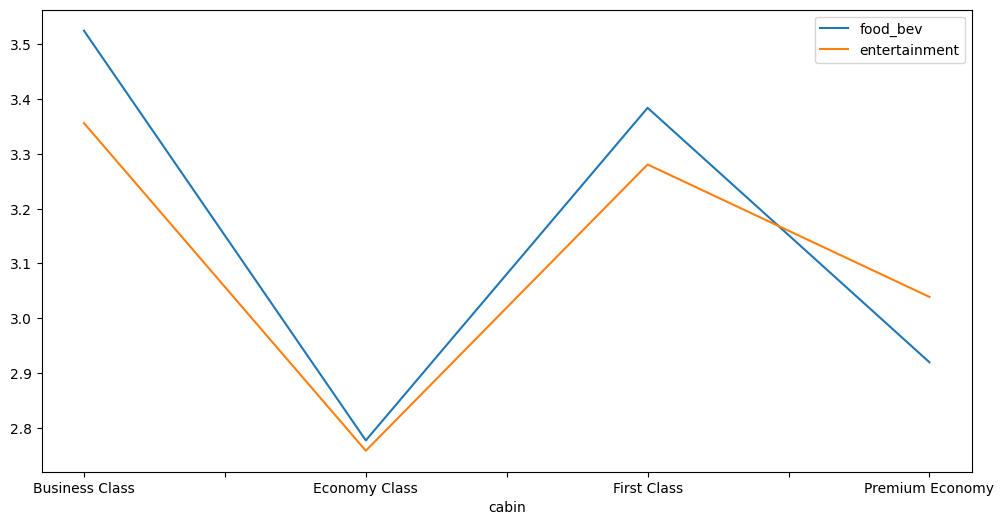

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
q1.plot(x="cabin",y=["food_bev","entertainment"], kind="line")



*  Based on the above plot , it can be inferred that the ratings given by passengers for food_bev and entertainment in economy class are comparatively lower than those in other cabin classes .



**Among the types of travelers , which one has the highest overall service ratings ?**

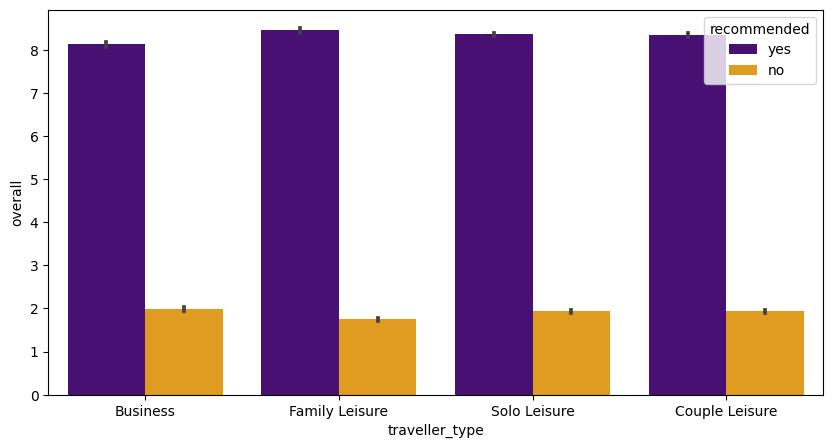

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="traveller_type",y="overall", hue = "recommended",data = aviation_df,palette=['indigo','orange'])
plt.show()

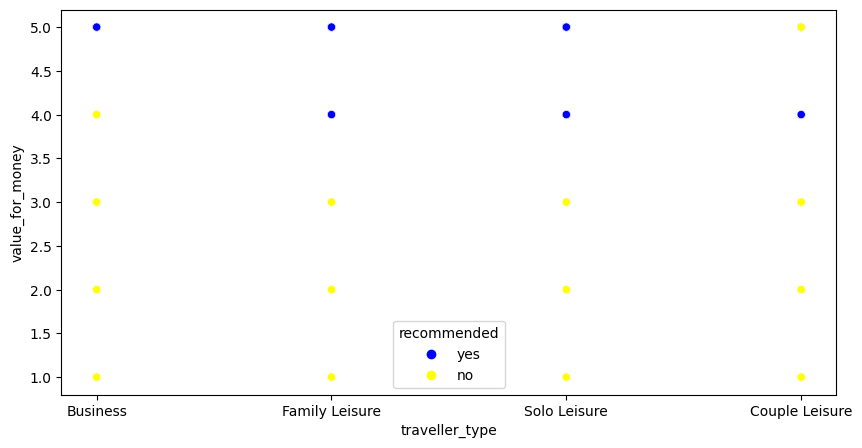

In [ ]:
#Traveller type and value for money ratings(out of 5)

plt.figure(figsize=(10,5))
sns.scatterplot(x="traveller_type",y="value_for_money",hue="recommended",data=aviation_df,palette=['blue','yellow'])
plt.show()

If a reviewer rates the cabin service as 5 , it is highly probable that they have recommended the airline regardless of the type of cabin . Furthermore , based on the available data , it can be concluded that the economy class is the most recommmended cabin type , while the business class is the least recommended one .

 **Among the different types of cabins which one has the highest overall service ratings?**


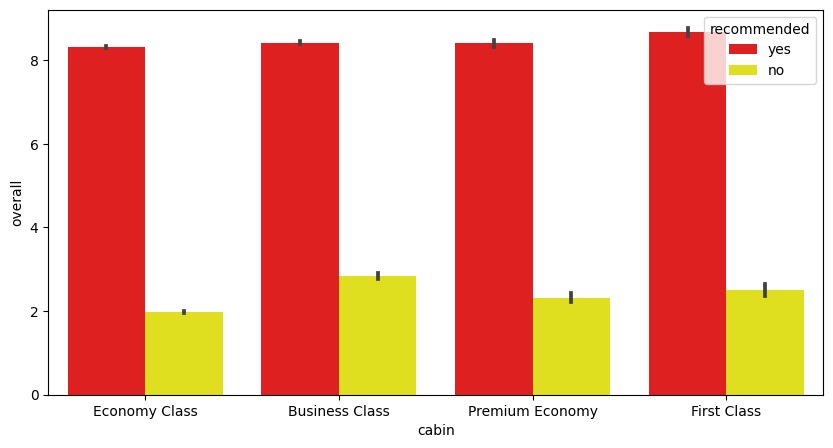

In [ ]:
#cabin type and overall service ratings(out of 10)
plt.figure(figsize=(10,5))
sns.barplot(x="cabin",y="overall",hue="recommended",data = aviation_df,palette=['red','yellow'])
plt.show()

If the overall rating for the trip is higher likely that the travellers would recommmend the airline to their friends , regardless of the cabin type . on the other hand , if overall rating is below 3 , it indicates that the travellers had an unstaisfactory experience and would not recommended the airline to their friends , regardless of their cabin type.

**Which type of traveler has received more ratings?**

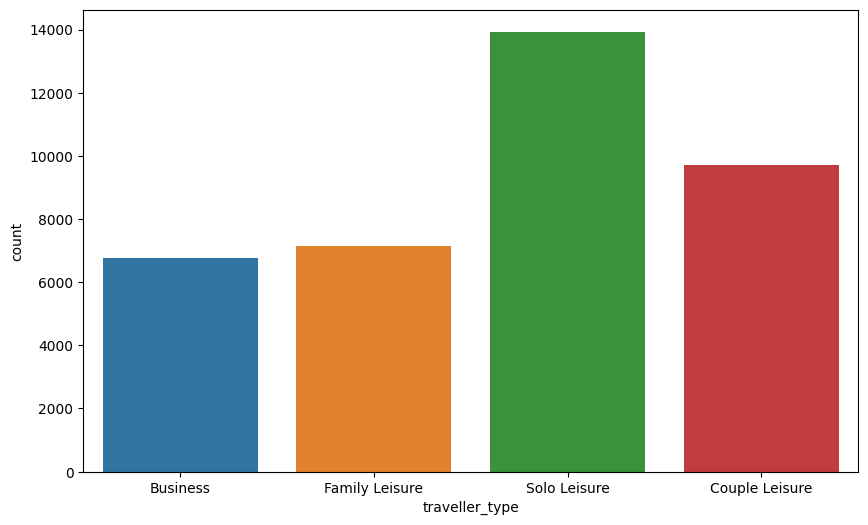

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="traveller_type",data = aviation_df)
plt.show()

Based on the given plot , it can be observed that the travelling type 'solo leisure' has the highest number of ratings compared to other travelling types .

**Which airline conducted the highest number of trips?**

In [ ]:
trip_by_airlines=aviation_df['airline'].value_counts()
trip_by_airlines

Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 81, dtype: int64

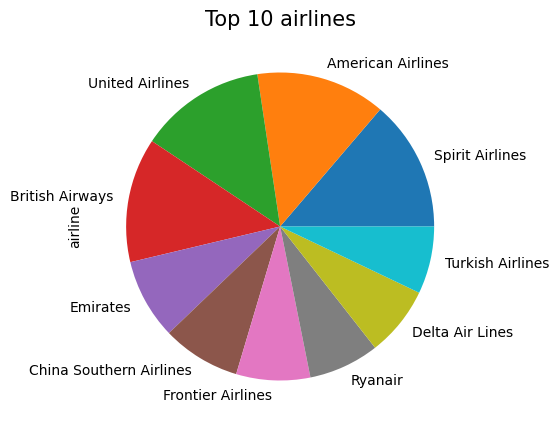

In [ ]:
plt.figure(figsize=(20,5))
trip_by_airlines[:10].plot(kind='pie')
plt.title('Top 10 airlines',fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

Based on the analysis of the dataset . the top 10 airlines with the highest number of trips are -

1. Spirit airlines
2. american airlines
3. united airlines
4. british airways
5. emirates
6. china southern airline
7. frontier airlines
8. ryanair
9. delta air lines
10. turkish airlines


**Does Solo leisure provide good value for money ?**

<Axes: xlabel='traveller_type', ylabel='value_for_money'>

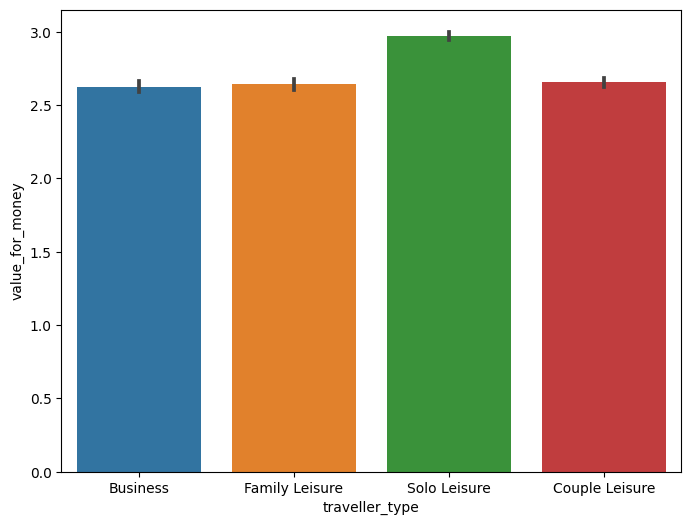

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=aviation_df['traveller_type'],y=aviation_df['value_for_money'])

Based on the barplot above , it appears that solo leisure travel type provides good value for money compared to other travel types.

**Which type of cabin receives more recommendations?**

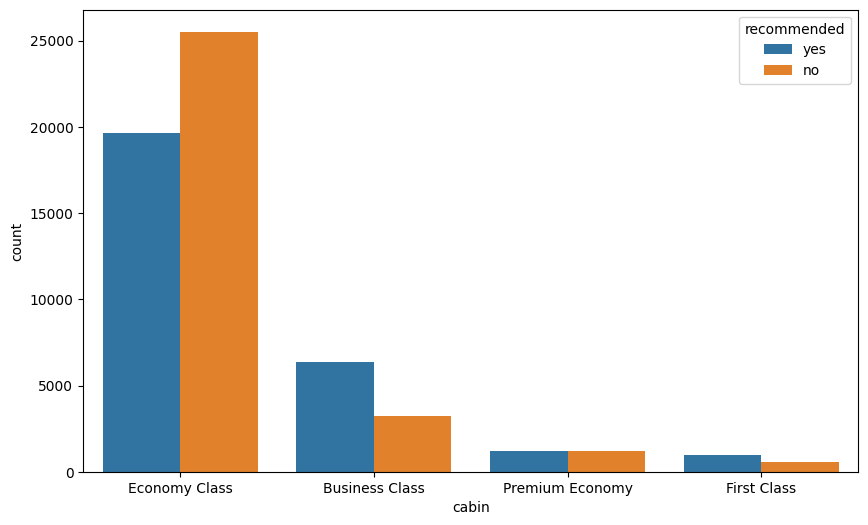

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='cabin',hue='recommended',data=aviation_df)
plt.show()

Based on the graph ,


* Economy class has the highest number of recommendations even with negative reviews .


*   Business class is the second most recommended cabin type with mostly positive reviews .
*   Premium economy has equal positive and negative reviews .


*   First class has the least number of recommendation despite having mostly positive reviews .







**Which type of cabin has recieved more service ratihs?**

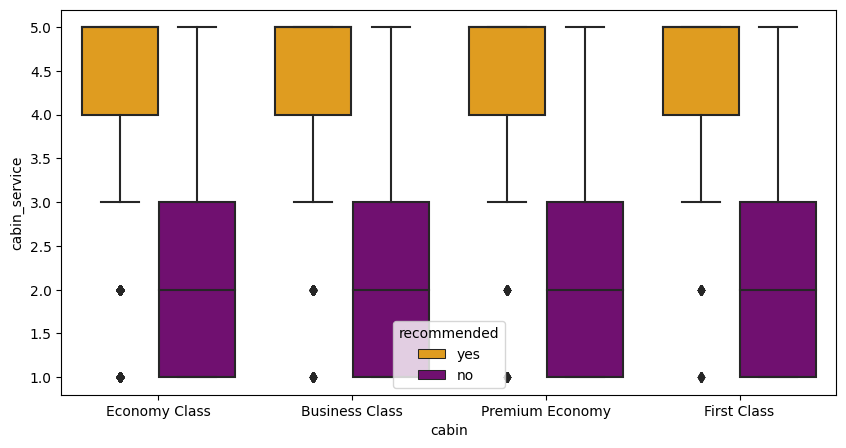

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cabin',y='cabin_service',hue='recommended',data=aviation_df,palette=['orange','purple'])
plt.show()



*   The least probability of recommending the airlines is seen among the first class travellers.
*   It is highly likely that the airlines will be recommended when the cabin service is rated with full 5 stars .


*   For economy class, ratings between 4 to 5 indicate that the airlines are recommended.






**Which airline conducted the lowest number of trips?**

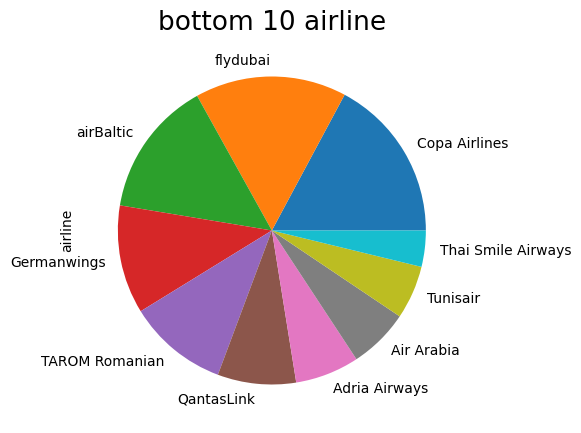

In [ ]:
plt.figure(figsize=(20,5))
trip_by_airlines[-10:].plot(kind='pie')
plt.title('bottom 10 airline',fontsize=19)
plt.xticks(rotation='horizontal')
plt.show()

**How do all of the independent variables /features compare with each other?**

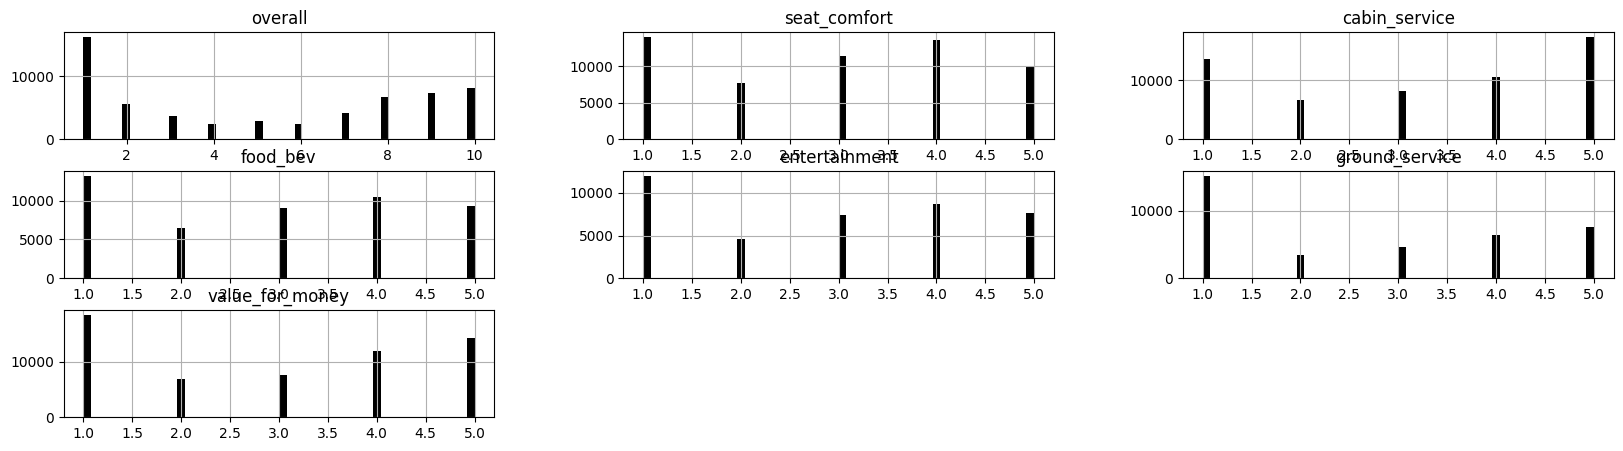

In [ ]:
aviation_df.hist(bins=50,figsize=(20,5),color='black')
plt.show()

BASED ON THE HISTOGRAM PLOT-


*   we can see that the overall feature ratings of 1 to 2 are the most frequent . The seat comfort feature has the highest number of ratings of 1 , followed by ratings of 4 .
* The cabin service feature has the highest number of ratings of 5 , followed by ratings of 1 .


*   For the food bev feature, the ratings of 2,4and 5 are approximately equally frequent . This means that passengers have varying opinions on the quality of food and beverages provided by the airline .
*   In terms of the entertainment and ground service features , the ratings of 3 are the most frequent followed by ratings 1.


*   From the value for money feature, we can see that most passengers give ratings of 1 , indicating that the airline does not provide good value for money .








**Droping Unnecessary columns**

In [ ]:
def missing_values_per_check(df):
  percent_missing=aviation_df.isnull().sum()*100/len(aviation_df)
  missing_values_df=pd.DataFrame({'column_name':aviation_df.columns,
                                  'percent_missing':percent_missing})
  return missing_values_df.sort_values('percent_missing',ascending=False)

In [ ]:
missing_values_per_check(aviation_df)

,column_name,percent_missing
aircraft,aircraft,69.782950
ground_service,ground_service,39.250458
date_flown,date_flown,38.817338
route,route,38.688219
traveller_type,traveller_type,38.644090
entertainment,entertainment,34.247516
food_bev,food_bev,20.990782
seat_comfort,seat_comfort,8.127942
cabin_service,cabin_service,8.080544
cabin,cabin,4.051713


In [ ]:
aviation_df.aircraft.nunique()

2088

**Removing the aircraft column from the dataset as it contains a large number of missing values.**

In [ ]:
aviation_df=aviation_df.drop(['aircraft'],axis=1)

In [ ]:
aviation_df=aviation_df.drop(['author','review_date','route','date_flown','customer_review'],axis=1)
aviation_df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes


The reason for dropping certain columns from the dataset are :


*   Author:This categorical column has high variability and is not required for prediction purposes.
*   Route - It is independent of the services and quality of travel hence not needed for model building .


*   Date-flown - It is not a time -series data , and there are some common time periods between two dates , thus not needed for model building .
*   Review_date - It is similar to date_flown, hence not required .


*   Customer_review - This column is related to the overall review feature of the dataset and is redundant.


On the basis of null value percentage we divide our data in two parts -


*   high_null - Columns which have high percentage of null values .

*   low_null - columns which have low percentage of null values.









In [ ]:


low_null_values=['overall','seat_comfort','cabin_service','value_for_money']
high_null_values=['food_bev','entertainment','ground_service']

In [ ]:
#imputation technique using quantile-1 value
def quantile1(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)


In [ ]:
#looping the null value column
for col in low_null_values:
  quantile1(aviation_df,col)


Imputed null values by quantile 1 , for the columns have low null value percentage .



In [ ]:
def median_input(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [ ]:
for col in high_null_values:
  median_input(aviation_df,col)

Imputed null values by median imputation for the columns have high percentage.


In [ ]:
#after imputed null values
aviation_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,1.0,NaN,NaN,2.0,2.0,3.0,3.0,3.0,1.0,NaN


Now we are left with null values in traveller_type , cabin , recommended column.

In [ ]:
#remove recommended null value row
aviation_df.dropna(subset=["recommended"],inplace=True)

In [ ]:
aviation_df['traveller_type'].fillna(method='ffill',inplace=True)

In [ ]:
aviation_df['cabin'].fillna(aviation_df['cabin'].mode().values[0],inplace=True)

filling traveller_type column with mode imputation

cabin column with forward fill method .





In [ ]:
aviation_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes


In [ ]:
#checking the new null value percentage
missing_values_per_check(aviation_df)


,column_name,percent_missing
airline,airline,0.0
overall,overall,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0
entertainment,entertainment,0.0
ground_service,ground_service,0.0
value_for_money,value_for_money,0.0


In [ ]:
aviation_df.shape

(59761, 11)

Having a clean dataset is crucial for accurate prediction , and it is preferable to work with a smaller , cleaner dataset rather than larger but corrupted dataset

**converating target as a categorical data into numerical data:'Label Encoding'**

In [ ]:
#converting targeted column
aviation_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [ ]:
aviation_df.head(5)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,0
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,1
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,0


<Axes: >

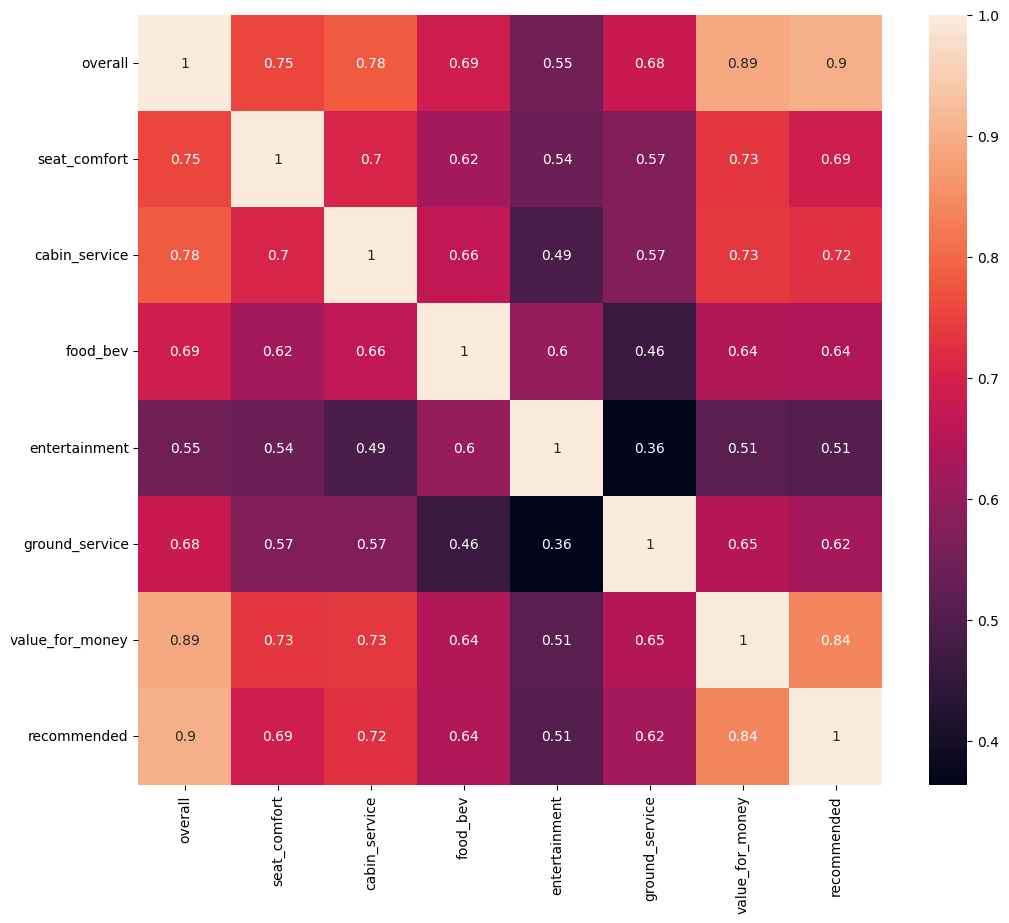

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(aviation_df.corr(),annot=True)

Correlation plot -
Remove the overall column from the dataset as it shows the highest correlation with other features , which coould lead to multicollinearity issues during predictive modeling .

**Removing multicollinearity features**

In [ ]:
#creating a function to remove multicollinearity
def calculate_vif(X):
  vif=pd.DataFrame()
  vif["variables"]=X.columns
  vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return(vif)


In [ ]:
calculate_vif(aviation_df[[i for i in aviation_df.describe().columns if i not in ['recommended','value_for_money','overall']]])

,variables,VIF
0,seat_comfort,12.743652
1,cabin_service,12.939449
2,food_bev,13.023156
3,entertainment,9.669901
4,ground_service,8.380607


In [ ]:
#drop overall column
aviation_df.drop(["overall"],axis=1,inplace=True)


In [ ]:
aviation_df.drop(["airline"],axis=1,inplace=True)

Here , we are removing the "airline" column from our dataset as it is not needed for further analysis or modeling .


**Defining the dependent and independent variables .**

In [ ]:
#separating the dependent and independent variables
y=aviation_df['recommended']
x=aviation_df.drop(columns='recommended')


In [ ]:
x.columns

Index(['traveller_type', 'cabin', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money'],
      dtype='object')

**One hot encoding**

In [ ]:
x=pd.get_dummies(x)

In [ ]:
x.shape

(59761, 14)

In [ ]:
x.head(2)

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,0,0,1,0,0
3,4.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0,1,0,0


In [ ]:
print("The percenatge of no labels of target variable is ",np.round(y.value_counts()[0]/len(y)*100))
print("The percenatge of Yes labels of target variable is ",np.round(y.value_counts()[1]/len(y)*100))


The percenatge of no labels of target variable is  52.0
The percenatge of Yes labels of target variable is  48.0


Since the percentage of both labels ('yes' and 'no') is approximately equal , it is not necessary to use any class imbalance handling technique.

**Splitting train and test data**

In [ ]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(47808, 14)
(11953, 14)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(47808,)
(11953,)


**ML Model Implementation**

**Model-1 : Fitting logistic Regression**

In [ ]:
log_reg= LogisticRegression(fit_intercept=True , max_iter = 10000)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.coef_

array([[ 0.29470524,  0.54964494,  0.43522642,  0.24880929,  0.72092498,
         1.63381309,  0.15000711, -0.04985052, -0.15934752,  0.06655806,
         0.14922398, -0.06516326,  0.11367346, -0.19036704]])

In [ ]:
log_reg.intercept_


array([-11.84300155])

In [ ]:
log_reg.score(x_test,y_test)

0.9324019074709278

In [ ]:
y_pred=log_reg.predict(x_test)

In [ ]:
#report of logistic regression
report_lr = classification_report(y_test,y_pred)
print(report_lr)


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



93% accuracy with logistic regression.

<Axes: >

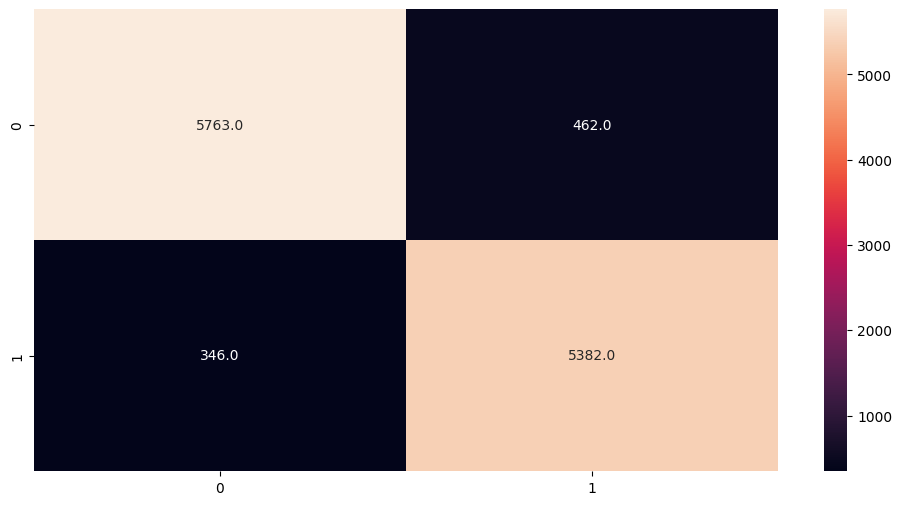

In [ ]:
#confusion matrix of logistic regression
confuse_matrix_lr=confusion_matrix(y_test,y_pred)
#plotting confusion matrix
sns.heatmap(confuse_matrix_lr,annot=True, fmt=".1f")

Implementing cross - validated logistic regression


In [ ]:
logistic=LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores=cross_val_score(log_reg,x_train,y_train,cv=10)
print('Cross-validation accuracy scores',scores)

Cross-validation accuracy scores [0.9405982  0.94415394 0.93766994 0.94122569 0.93913407 0.93474169
 0.94080736 0.94143485 0.93284519 0.93702929]


In [ ]:
scores=pd.Series(scores)
scores.min(),scores.mean(),scores.max()

(0.9328451882845188, 0.9389640216372515, 0.9441539426898139)

**Random forest**

In [ ]:
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
random_forest.score(x_test,y_test)

0.928971806241111

In [ ]:
report_ran_forest=classification_report(y_test,y_pred)
print(report_ran_forest)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



92% accuracy with random forest .

Implementing cross- validated random forest

In [ ]:
parameters = {
    'n_estimators':[10,50,100],
    'max_depth':[2,5,10,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [ ]:
random_forest_gridcv=GridSearchCV(estimator = random_forest, param_grid=parameters , cv=5, verbose=2)

In [ ]:
random_forest_gridcv.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.5s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=2, min_samples_leaf=1, min_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [ ]:
random_forest_gridcv.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

**Naive Bayes Classifier**

In [ ]:
naive_bayes=GaussianNB()
naive_bayes.fit(x_train,y_train)

In [ ]:
naive_bayes.score(x_train,y_train)

0.9177543507362784

91% accuracy with naive bayes classifier

In [ ]:
#making predictions on the testing set
y_pred=naive_bayes.predict(x_test)

In [ ]:
#comparing actual response values (y_test) with predicted response values(y_pred)
from sklearn import metrics
print("gaussian naive bayes model accuracy ",metrics.accuracy_score(y_test,y_pred)*100)

gaussian naive bayes model accuracy  91.0901029030369


**Decision Tree classifier**

In [ ]:
#Initializing decision tree model object
tree_classify=DecisionTreeClassifier()
tree_classify.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
print("Training accuracy of decision tree model ",tree_classify.score(x_train,y_train))
print("testing accuracy of decision tree model is ", tree_classify.score(x_test,y_test))

Training accuracy of decision tree model  0.9745440093708166
testing accuracy of decision tree model is  0.9164226554003179


In [ ]:
y_pred=tree_classify.predict(x_test)

In [ ]:
report_dec_tree=classification_report(y_test,y_pred)
print(report_dec_tree)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6225
           1       0.92      0.91      0.91      5728

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



Here we can say that the decision tree model is overfitted , meaning it is performing well on the training data but not on the unseen data. Therefore, we need to perform hyperparameter tuning to optimize the model and prevent overfitting , which involves pruning the decision tree to create a more generalized model .


Hyperparameter tuning for decision tree

In [ ]:
#setting the parameters and scoring metric
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['f1','recall','precision','accuracy']

In [ ]:
#performing hyperparameter tuning using gridsearchcv

#setting an estimator and crossvalidation

tree_cv=GridSearchCV(estimator=tree_classify,param_grid=parameters,scoring = scoring_,cv=5, refit='accuracy')

#fitting x and y to gridsearchcv model using an estimator decision tree classifier
tree_cv.fit(x_train,y_train)

In [ ]:
tree_cv.best_params_

In [ ]:
tree_cv.best_score_

93%accuracy of decision tree with the help of hypermatring tunning .


**Support Vector Machine**

In [ ]:
support_vector = SVC(kernel='linear')
support_vector.fit(x_train,y_train)

In [ ]:
support_vector.score(x_test,y_test)

93% accuracy with support vector machine.

In [ ]:
y_pred=support_vector.predict(x_test)

In [ ]:
#confusion matrix
support_vector_conf_matrix= confusion_matrix(y_test,y_pred)
support_vector_conf_matrix

**K nearest neighbour**

In [ ]:
k_neighbor=KNeighborsClassifier()
k_neighbor.fit(x_train,y_train)

In [ ]:
y_pred=k_neighbor.predict(x_test)

In [ ]:
#compute accuracy on the training set
train_accuracy = k_neighbor.score(x_train,y_train)
print(f"train_accuracy:",train_accuracy)

#compute accuracy on the test set
test_accuracy=k_neighbor.score(x_test,y_test)
print(f"test_accuracy:",test_accuracy)

92% accuracy in K nearest neighbor

In [ ]:
#confusion matrix of k_neighbor
confuse_matrix_k_neighbor=confusion_matrix(y_test,y_pred)
confuse_matrix_k_neighbor

In [ ]:
#area under roc curve
roc_auc_score(y_test,y_pred)

**Accuracy metrics for all fitted model**

In [ ]:
#creating a function to return all models accuracy score

def accuracy_of_each_model(model,X_train,X_test):
  y_train_preds=model.predict(X_train)
  y_test_preds=model.predict(X_test)
  train_scores=[]

  test_scores=[]
  metrics = ['Accuracy_Score','Precision_Score','Recall_Score','Roc_Auc_Score']

  train_accuracy_score=accuracy_score(y_train,y_train_preds)
  test_accuracy_score=accuracy_score(y_test,y_test_preds)

  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score=roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics




In [ ]:
models=[log_reg,random_forest,naive_bayes,tree_cv,support_vector,k_neighbor]
name = ['Logistic Regression Model', 'Random Forest Model After Hyperparameter Tuning','Naive Bayes Classifier','Decision Tree Model After Hyperparameter Tuning','Support Vector Machine','K-Nearest Neighbor']

In [ ]:
for model_idx in range(len(models)):
  train_score,test_score,metrics = accuracy_of_each_model(models[model_idx],x_train,x_test)
  print("-"*30)
  print(f"{name[model_idx]}")
  print("-"*30)
  results_df=pd.DataFrame({'Metric':metrics,'Train Score':train_score,'Test Score':test_Score})
  print(results_df.to_string(index=False))
  print("")

Conclusion -

Six different classification models were used
for this problem: Logistic Regression, Random Forest, Naive Bayes, Decision Tree, Support Vector Machine, and K-Nearest Neighbor.

 All of the models achieved an accuracy score of over 90%, indicating that they are all effective at predicting the outcome.

 Hyperparameter tuning was performed using GridSearch CV method to avoid overfitting and increase accuracy for Decision Tree, Random Forest, K-Nearest Neighbor, Support Vector Machine, and Naive Bayes models.

The Gradient Boosting model was finalized after hyperparameter tuning.

 The classification metrics were prioritized in the following order: Recall, Accuracy, and ROC AUC

The most important features that contribute to a model's prediction are overall rating and value for money.

Support Vector Machine had the highest accuracy rate among the experimented models, followed closely by Logistic Regression.

 The developed classification models can be used to predict passenger referrals and help airlines identify impactful passengers who can bring more revenue.

To increase business and growth, airlines should focus on providing excellent cabin service, ground service, food and beverage, entertainment, and seat comfort.

The Random Forest model achieved the highest training score, but the Logistic Regression model achieved the highest test score. This suggests that the Logistic Regression model is better at generalizing to new data.

The Naive Bayes classifier had the lowest accuracy scores, but still achieved an accuracy of over 90% on both the training and test sets This suggests that the dataset is relatively easy to classify and all of the models performed well.

The most important metrics for this problem were Recall and Accuracy, and all of the models achieved high scores on both of these metrics.

 The K-Nearest Neighbor model achieved slightly lower scores than the other models, but still achieved an accuracy score of over 92% on the test set.

The Support Vector Machine model achieved the highest Recall score on the test set, indicating that it was better at identifying true positives than the other models.

Overall, all of the models performed well on the given dataset, but the Logistic Regression and Support Vector Machine models may be better choices depending on the specific needs of the problem.